# 0. General Pattern Recognition Mode of Operation 

* A common overall approach for pattern recognition and machine learning:
	* Collect training data relevant to your problem/application
	* Preprocess the training data, extract features, preprocess/normalize the Features
	* Assume a model for your problem and the associated features
	* Train the model by estimating model parameters 
	* Collect test data, apply same preprocessing and feature extraction, apply the trained model to test data
* Many "tricks" in making the above work well
* Of course, this is not the only way.  Just a very common approach. 


<img src="open_source_trainingoverview.png" alt="Overview of Training" style="width: 8000px;"/>

<img src="learningalg.png" style="width: 500px;"/>

<img src="open_source_testingoverview.png" alt="Overview of Training" style="width: 8000px;"/>



* One example:  Suppose you would like to estimate someone's age from a photograph.  
	* Collect training data by collecting photographs of individuals and labeling each photo with the age of the individual
	* Preprocess the imagery (e.g., by downsampling or cropping each image to be the same size), Extract features (e.g., face shape/contour descriptors, facial hair indicator, etc.. ) 
	* Assume that a neural network is an appropriate model.
	* Train the neural network using backpropagation
	* When given incoming test data, extract features in same manner and determine age using the trained neural network. 
* You could also assume a "dictionary learning" model instead of a neural network or you could assume a convolutional neural network model with the raw pixel values as features
* You could extract other features
* You could train your model using MCMC sampling instead of backpropagation
* and the options go on and on... 

# 1. Polynomial Curve Fitting Example

* Suppose we are given a training set comprising of $N$ observations of $x$, $\mathbf{x} = (x_1, x_2, \ldots, x_N)^T$ along with desired outputs $\mathbf{t} = (t_1, t_2, \ldots, t_N)^T$

* We generally organize data into *vectors* and *matrices*. Not only is it a common way to organize the data, but it allows us to easily apply linear algebraic operations during analysis.

## Let us review some linear algebra:
  * What is a vector?
  \begin{equation} \mathbf{x} = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_D\end{array} \right] \end{equation}
  
  * What is the transpose operation? 
    \begin{equation}
		 \mathbf{x}^T = \left[  x_1,  x_2 , \cdots , x_D \right]
         \end{equation}
         
  * Vectors are often used to represent a data point (as a concatenation of all of the associated features for the data point)
  * Given a vector $\mathbf{x} \in \mathbb{R}^D$ and a scalar value $a$, what is $a\mathbf{x}$?  What does this operation do geometrically? 
  * Given $\mathbf{x} \in \mathbb{R}^D$ and $\mathbf{y} \in \mathbb{R}^D$, what is $\mathbf{x} + \mathbf{y}$?  What is the geometric interpretation? 
  * Given $\mathbf{x} \in \mathbb{R}^D$ and $\mathbf{y} \in \mathbb{R}^D$, what is $\mathbf{x} - \mathbf{y}$? What is the geometric interpretation?

In [1]:
import numpy as np
a = 2
x = np.array([[1,2,3]])
y = np.array([[4],[5],[6]])
print('x:',x)
print('x.T:',x.T)
print('a*x:', a*x)
print('x+y.T:', x+y.T)
print('y-x.T:',y-x.T)

x: [[1 2 3]]
x.T: [[1]
 [2]
 [3]]
a*x: [[2 4 6]]
x+y.T: [[5 7 9]]
y-x.T: [[3]
 [3]
 [3]]


* Recall: $\left(\mathbf{A}^T\mathbf{B}\right)^T = \mathbf{B}^T\mathbf{A}$

* An important operation is the *inner product*:
$\mathbf{x}^T\mathbf{y} = \mathbf{y}^T\mathbf{x} = \sum_{i=1}^D x_iy_i$


In [2]:
print(x.dot(y))
print(x@y)
print(np.inner(x,y.T))

[[32]]
[[32]]
[[32]]


* What is the *outer product*? $xy^\top \!=\! \left[\!\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_d\end{array}\!\right]\!\!
\left[\!\begin{array}{c}
y_1\\
y_2\\
\vdots\\
y_n\end{array}\!\right]^\top \!\!=\! \left[\!\begin{array}{c c c c}
x_1y_1 & x_1y_2 & \cdots & x_1y_n\\
x_2y_1 & x_2y_2 & \cdots & x_2y_n\\
\vdots & \vdots & \ddots & \vdots\\
x_dy_1 & x_dy_2 & \cdots & x_dy_n\end{array}\!\right]\! \!\in\! \mathcal{R}^{d \times n}.
$

In [3]:
print(np.outer(x,y))

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


In [4]:
print(np.outer(x,y).T)

[[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]]


The $l_p$ norm is an important concept. Given a vector, $\mathbf{x}$ and a $p$-value, the $l_p$ norm is defined as:
\begin{eqnarray}
\left\|\mathbf{x}\right\|_p = \left( \sum_{d=1}^D |x_d|^p \right)^{\frac{1}{p}}
\end{eqnarray}

So, if $p=2$, then the $l_2$ norm of a vector is:
\begin{eqnarray}
\left\|\mathbf{x}\right\|_2 = \left( \sum_{d=1}^D |x_d|^2 \right)^{\frac{1}{2}}
\end{eqnarray}

In [5]:
x = np.array([1, 2, 3])
print(np.linalg.norm(x,ord=2))
print((x@x)**(1/2))
print(np.linalg.norm(x,ord=3))
print(np.linalg.norm(x,ord=1))

3.74165738677
3.74165738677
3.30192724889
6.0


In [6]:
x = np.array([-1, -2, -3])
print(np.linalg.norm(x,ord=2))
print((x@x)**(1/2))
print(np.linalg.norm(x,ord=3))
print(np.linalg.norm(x,ord=1))
print(np.linalg.norm(x,ord=0))

3.74165738677
3.74165738677
3.30192724889
6.0
3.0


In [7]:
x = np.array([-1, 0, 3])
print(np.linalg.norm(x,ord=2))
print((x@x)**(1/2))
print(np.linalg.norm(x,ord=3))
print(np.linalg.norm(x,ord=1))
print(np.linalg.norm(x,ord=0))

3.16227766017
3.16227766017
3.03658897188
4.0
2.0


## Note the notation:  
   * scalar values are unbolded (e.g., $N$, $x$)
   * vectors are lower case and bolded (e.g., $\mathbf{x}$)
   * matrices are uppercase and bolded (e.g., $\mathbf{A} \in \mathbb{R}^{D \times N}$)
   * vectors are generally assumed to be column vectors (e.g., $\mathbf{x}^T = \left(x_1, \ldots, x_N\right)$ and $\mathbf{x} =  \left(x_1, \ldots, x_N\right)^T$ )


## Back to the Polynomial Curve fitting Example
* Suppose the data truly came from some unknown hidden function.  All we have is the training data (which includes noise) and we want to learn a mapping from input values $x$ to desired output values $t$.  We will learn (i.e., train a model to estimate) that mapping from the training data $\left\{ \mathbf{x}, \mathbf{t} \right\}$.  Then, when we are given test data, we can predict each test data point's $t$ value.

* For this problem, we assume that the original data $x$ is sufficient and appropriate (so, we do not need to preprocess or extract features).  Then, we have completed steps 1 and 2 of the general approach listed in Section 0 above.

* Now we must assume a model.  Lets assume a polynomial function as our model: 

$y(x,\mathbf{w}) = w_0 + w_1x + w_2x^2 + \ldots + w_Mx^M = \sum_{j=0}^M w_jx^j$

* Now we must *train* this model by estimating the unknown parameters ($\mathbf{w}$) that maps the training data, $\mathbf{x}$, to their desired values, $\mathbf{t}$, given some assumed value for $M$

* So, we have $N$ discrete points from which to estimate $\mathbf{w}$.  We can minimize the squared error to estimate the parameters:
	\begin{eqnarray}
		\arg \min_\mathbf{w} E(\mathbf{w}) &=& \frac{1}{2} \sum_{n=1}^N \left( y(x_n, \mathbf{w}) - t_n\right)^2\\
		&=& \frac{1}{2} \sum_{n=1}^N \left(\sum_{j=0}^M w_jx_n^j -t_n \right)^2
	 \end{eqnarray}
* Consider the following illustration of the error function: 
<img src="fig1.jpg"  style="width: 200px;"/>
The red lines correspond to the error between the data and the functional approximation.  



*  We can write the error function compactly in matrix/vector form: 
	 \begin{eqnarray} \nonumber
	 	E(\mathbf{w}) &=& \frac{1}{2} \left( \left[w_0, w_1, \ldots, w_M \right] \left[ \begin{array}{c c c c} 1 & 1 & \ldots & 1\\ x_1 & x_2 & \ldots & x_n \\  x_1^2 & x_2^2 & \ldots & x_n^2 \\ \vdots & \vdots & \ddots & \vdots \\  x_1^M & x_2^M & \ldots & x_n^M \end{array}\right] - \left[ t_1, t_2, \ldots, t_N\right]\right)\\
	 	& & \left( \left[w_0, w_1, \ldots, w_M \right] \left[ \begin{array}{c c c c} 1 & 1 & \ldots & 1\\ x_1 & x_2 & \ldots & x_n \\  x_1^2 & x_2^2 & \ldots & x_n^2 \\ \vdots & \vdots & \ddots & \vdots \\  x_1^M & x_2^M & \ldots & x_n^M \end{array}\right]- \left[ t_1, t_2, \ldots, t_N\right]\right)^T \nonumber\\
        &=& \frac{1}{2}  \left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)^T\\
        &=& \frac{1}{2}\left\| \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T \right\|_2^2
	 \end{eqnarray}
     where  
     \begin{eqnarray}\mathbf{X}^T &=& \left[ \begin{array}{c c c c} 1 & 1 & \ldots & 1\\ x_1 & x_2 & \ldots & x_n \\  x_1^2 & x_2^2 & \ldots & x_n^2 \\ \vdots & \vdots & \ddots & \vdots \\  x_1^M & x_2^M & \ldots & x_n^M \end{array}\right]\\
     &=& \left[ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\right]
     \end{eqnarray}
    and
    \begin{eqnarray}\mathbf{x}_i = \left[x_i^0, x_i^1, x_i^2, \ldots, x_i^M \right]^T \end{eqnarray}

* So, we want $E(\mathbf{w})$ to be small.  How do we solve for $\mathbf{w}$?
* We can take the derivative of the error function, set it to zero, and solve for the parameters.  In general, this method does not guarantee that the parameters we estimate are minima of the error function (e.g., may be an inflection point, maxima).  It is a necessary condition (but not sufficient). However, if the function is convex, then it will always find the global optima. 


* How do we take the derivative of a function with respect to a vector? 
	 \begin{equation*}
\frac{\partial}{\partial \mathbf{x}}f(\mathbf{x}) =\! \left[\frac{\partial}{\partial x_1}f(\mathbf{x}),\frac{\partial}{\partial x_2}f(\mathbf{x}),\ldots,\frac{\partial}{\partial x_n}f(\mathbf{x})\right]^\top\!\!\in\! \mathcal{R}^{n \times 1}.
\end{equation*}

* So, what would the derivative of $E(\mathbf{w})$ be with respect to $\mathbf{w}$? 
\begin{eqnarray}
 E(\mathbf{w}) &=& \frac{1}{2} \sum_{n=1}^N \left(\sum_{j=0}^M w_jx_n^j -t_n \right)^2\\
\frac{\partial E(\mathbf{w})}{\partial \mathbf{w}} &=& \left[ \frac{\partial E(\mathbf{w})}{\partial w_0},  \frac{\partial E(\mathbf{w})}{\partial w_1}, \ldots,  \frac{\partial E(\mathbf{w})}{\partial w_M} \right]^T\\
&=& \left[ \sum_{n=1}^N \left( \sum_{j=0}^M w_jx_n^j -t_n \right)x_n^0 ,  \sum_{n=1}^N \left(  \sum_{j=0}^M w_jx_n^j -t_n \right)x_n^1 , \ldots, \sum_{n=1}^N \left(  \sum_{j=0}^M w_jx_n^j -t_n \right)x_n^M  \right]^T  \nonumber
\end{eqnarray}

* Similarly, 
\begin{eqnarray}
		  \frac{\partial E(\mathbf{w})}{\partial \mathbf{w}} &=& \frac{1}{2} 2 \left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\mathbf{X}
	 \end{eqnarray}
	where $\mathbf{X}^T= \left[ \begin{array}{c c c c} 1 & 1 & \ldots & 1\\ x_1 & x_2 & \ldots & x_n \\  x_1^2 & x_2^2 & \ldots & x_n^2 \\ \vdots & \vdots & \ddots & \vdots \\  x_1^M & x_2^M & \ldots & x_n^M \end{array}\right]$.
* Then, we can set the derivative to zero and solve: 
\begin{eqnarray}
		 & & 0 = \mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{X}^T\mathbf{t}\\
		 & & \mathbf{X}^T\mathbf{t} = \mathbf{X}^T\mathbf{X}\mathbf{w} \\
		 & & \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}
	 \end{eqnarray}



## Apply to data generated from a (noisy) sine curve 


* Suppose our data actually came from: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is Gaussian zero-mean random noise. 
* The univariate Gaussian Distribution: 
	\begin{eqnarray}
		\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}} \exp\left\{ - \frac{1}{2\sigma^2}(x - \mu)^2\right\}
	\end{eqnarray}

<img src="fig2.jpg"  style="width: 200px;"/>

* If the noise is zero-mean Gaussian distributed, it is like we are saying there is a Gaussian around the true curve: 

<img src="fig3.jpg"  style="width: 200px;"/>

\begin{eqnarray}
		 t = y + \epsilon\\
		 \epsilon = t - y
	 \end{eqnarray}
	 where
	 \begin{eqnarray}
	 	\epsilon \sim \mathcal{N}(0, \sigma^2)
 	 \end{eqnarray}
 	 thus
 	 \begin{eqnarray}
 	 	\mathcal{N}(t-y|0,1) &\propto& \exp\left\{ -\frac{1}{2} \frac{(t-y-0)^2}{1^2} \right\}\\
 	 	&=& \exp\left\{ -\frac{1}{2} (t-y)^2 \right\}\\
 	 	&=&  \exp\left\{ -E(\mathbf{w}) \right\}
 	\end{eqnarray}

* So, the squared error objective function, $E(\mathbf{w})$, assumes Gaussian noise. 
* Another way to look at it: $t$ is distributed according to a Gaussian distribution with mean $y$

* First, lets generate data from the *true* underlying function (which, in practice, we would not know)


In [35]:
import math 

def generateUniformData(N, l, u, gVar):
	'''generateUniformData(N, l, u, gVar): Generate N uniformly spaced data points 
    in the range [l,u) with zero-mean Gaussian random noise with variance gVar'''
	# x = np.random.uniform(l,u,N)
	step = (u-l)/(N);
	x = np.arange(l+step/2,u+step/2,step)
	e = np.random.normal(0,gVar,N)
	t = np.sin(2*math.pi*x) + e
	return x,t

l = 0
u = 1
N = 100
gVar = .1
data_uniform  = np.array(generateUniformData(N, l, u, gVar)).T

* Lets plot this data and the underlying *true* function

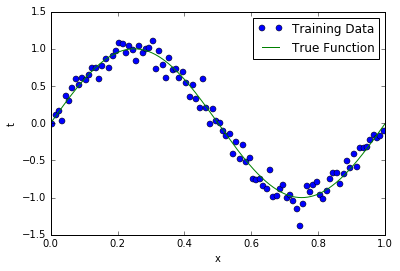

In [36]:
import matplotlib.pyplot as plt
import textwrap
%matplotlib inline 

fig = plt.figure()

def plotData(x1,t1,x2,t2,x3=None,t3=None,legend=[]):

    #plot everything
    p1 = plt.plot(x1, t1, 'bo') #plot training data
    p2 = plt.plot(x2, t2, 'g') #plot true value
    if(x3 is not None):
        p3 = plt.plot(x3, t3, 'r') #plot training data

    #add title, legend and axes labels
    plt.ylabel('t') #label x and y axes
    plt.xlabel('x')
    
    if(x3 is None):
        plt.legend((p1[0],p2[0]),legend)
    else:
        plt.legend((p1[0],p2[0],p3[0]),legend)

x1 = data_uniform[:,0]
t1 = data_uniform[:,1]

x2 = np.arange(l,u,0.001)  #get equally spaced points in the xrange
t2 = np.sin(2*math.pi*x2) #compute the true function value
    
plotData(x1, t1, x2, t2,legend=['Training Data', 'True Function'])

* Now lets fit the data using the polynomial curve fitting approach

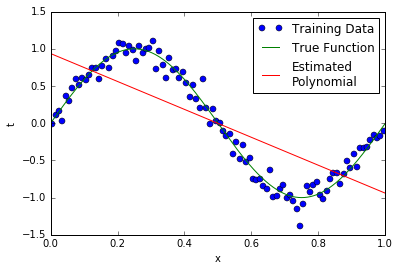

In [38]:
def fitdata(x,t,M):
	'''fitdata(x,t,M): Fit a polynomial of order M to the data (x,t)'''	
	#This needs to be filled in
	X = np.array([x**m for m in range(M+1)]).T
	w = np.linalg.inv(X.T@X)@X.T@t
	return w

        
M = 1
w = fitdata(x1,t1,M)
xrange = np.arange(l,u,0.001)  #get equally spaced points in the xrange
X = np.array([xrange**m for m in range(w.size)]).T
esty = X@w #compute the predicted value
plotData(x1,t1,x2,t2,xrange,esty,['Training Data', 'True Function', 'Estimated\nPolynomial'])

## Overfitting/Overtraining

* In the polynomial curve fitting example, $M$ is the *model order*. 
* As $M$ increases, there are more parameters (more $w$) to learn and, so, the model becomes more complex.  
* As a model is more and more complex, it is more likely to *overfit* or *overtrain*.  This essentially means it may "memorize" the input training data (including all of the training data's noise).  
* Overfitting means that the performance of the model will likely decrease on unknown test data.  Overfitting means that the "true" underlying model of the data is not estimated/learned but instead results in a poor representation that memorizes meaningless noise in the data.
* There are two common approaches to avoid overfitting:
     1. More data: As you have more and more data, it becomes more and more difficult to "memorize" the data and its noise. Often, more data translates to the ability to use a more complex model and avoid overfitting.  However, generally, you need exponentially more data with increases to model complexity.  So, there is a limit to how much this helps.  If you have a very complex model, you need a huge training data set. 
     2. Regularization: Regularization methods add a penalty term to the error function to discourage overfitting.  These penalty terms encourage small values limiting the ability to overfit.  (This is just a teaser. We will discuss this further in the future.)


* You can also *underfit* your data.  When you underfit, your model complexity is not complex enough to model all of the complexities in your data. 


## Beer Foam Example

* Lets go through the Polynomial Curve fitting again with another example
* Obtained from: http://www.stat.ufl.edu/~winner/datasets.html 

Source: A. Leike (2002). "Demonstration of the Exponential Decay Law Using Beer Froth," European Journal of Physics, Vol. 23, #1, pp. 21-26

Description: Measurements of wet foam height and beer height at various time points for 3 brands of beer. Author fits exponential decay model: $H(t) = H(0)e^{-\lambda t}$

Variables/Columns:
<li> Time from pour (seconds)  4-8
<li> Erdinger Weissbier foam height (cm)  10-16
<li> Augustinerbrau Munchen foam height (cm)    18-24
<li> Budweiser foam height (cm)    26-32

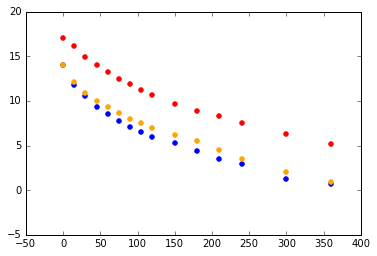

In [39]:
#Load Data
beerData = np.loadtxt('beer_foam.dat.txt')

plt.scatter(beerData[:,0], beerData[:,1], color = "red")
plt.scatter(beerData[:,0], beerData[:,2], color = "blue")
plt.scatter(beerData[:,0], beerData[:,3], color = "orange")

In [40]:
beerData

array([[   0. ,   17. ,   14. ,   14. ],
       [  15. ,   16.1,   11.8,   12.1],
       [  30. ,   14.9,   10.5,   10.9],
       [  45. ,   14. ,    9.3,   10. ],
       [  60. ,   13.2,    8.5,    9.3],
       [  75. ,   12.5,    7.7,    8.6],
       [  90. ,   11.9,    7.1,    8. ],
       [ 105. ,   11.2,    6.5,    7.5],
       [ 120. ,   10.7,    6. ,    7. ],
       [ 150. ,    9.7,    5.3,    6.2],
       [ 180. ,    8.9,    4.4,    5.5],
       [ 210. ,    8.3,    3.5,    4.5],
       [ 240. ,    7.5,    2.9,    3.5],
       [ 300. ,    6.3,    1.3,    2. ],
       [ 360. ,    5.2,    0.7,    0.9]])

[  1.37856533e+01  -1.29091083e-01   8.20245975e-04  -2.77980042e-06
   3.38205356e-09]


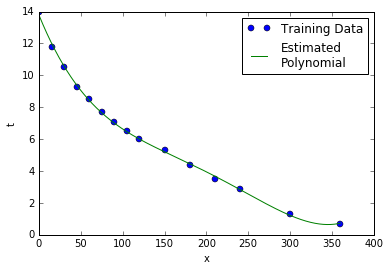

In [45]:
#Then we can fit the data using the polynomial curve fitting method we derived
x = beerData[:,0]
t = beerData[:,2]
w = fitdata(x,t,M=4)
print(w)

#Now let us use the weights in test
xrange = np.arange(beerData[0,0],beerData[beerData.shape[0]-1,0],0.001)  #get equally spaced points in the xrange
X = np.array([xrange**m for m in range(w.size)]).T
esty = X@w #compute the predicted value

plotData(x,t,xrange,esty,legend=['Training Data','Estimated\nPolynomial'])

In [46]:
#What will the foam height be at t = ____? 
t = 500
x_test = np.array([t**m for m in range(w.size)]).T
print(x_test)
predicted_height = x_test@w
print(predicted_height)

[          1         500      250000   125000000 62500000000]
18.2049002813


## Cross Validation and Training, Validation, Testing Data Sets

* Due to the potential for overfitting, performance on a training set is not a good indicator of general performance.  
* One approach to estimate performance of a system is to use of the data for training and some for validation. 
* If model design is iterated many times, you may even over fit the validation set.  So, you can hold out another set for testing. 
* Given limited data, we want to use any much data for training as possible.  But this may leave us with too little validation or testing data.  One method to help alleviate this issue is cross-validation. 
* However there are downsides to cross-validation: need to train many times (which can sometimes be very computationally complex), you end up with several models - how do you pick the final one to use?


# Reading Assignment: Read Chapter 3, Due before next class